# Wczytywanie danych

In [294]:
%matplotlib notebook
import pandas as pd
import numpy as np

# Przygotowanie nagłówków tabeli
column_names = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

# Wczytywanie danych
data = pd.read_csv('hepatitis.data', delimiter=',', names=column_names)


# Wyświetlenie pierwszych 10 instancji
data.head(10)

# Podział na klasy i atrybuty
X = data.drop('Class', axis=1)
y = data['Class']

X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Wstawianie brakujących danych

In [295]:
from sklearn.impute import SimpleImputer

# wstawianie nowych danych metodą najczęściej występujących
imr = SimpleImputer(missing_values='?', strategy='most_frequent')
imt = imr.fit(X)
X = pd.DataFrame(imr.transform(X), columns=X.columns)

X

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,100,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,100,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,100,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,85,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,100,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,100,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Kodowanie cech nominalnych

In [296]:
# tworzenie cech "gorącojedynkowych" z wybranych kolumn
dummies = pd.get_dummies(X[['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'HISTOLOGY']])
# połączenie nowych cech ze starymi (niekodowanymi wcześniej)
X = pd.concat([X[['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']], dummies], axis=1)

# Selekcja cech

In [297]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

# rank_range - ilość cech w rankingu
rank_range = X.shape[1]

# obiekt selekcji cech
selector = SelectKBest(chi2, k=rank_range)

# wybór cech
selector.fit(X, y)

# indeksy wybranych kolumn
cols = selector.get_support(indices=True)

# nowy zbiór w postaci DataFrame
features_df_new = X.iloc[:,cols]
features_df_new

# sortowanie zbioru pod względem parametru score
scores = selector.scores_
pvalues = selector.pvalues_
zipped_list = [[float(s), str(f), int(i), float(p)] for s, f, i, p in zip(scores, features_df_new.columns, cols, pvalues)]
zipped_list = sorted(zipped_list, key= lambda x: x[0], reverse=True)

# posortowane wyniki
zipped_list_scores = list(np.array(zipped_list)[:,0].astype(np.float))
zipped_list_columns = list(np.array(zipped_list)[:,1])
zipped_list_indexes = list(np.array(zipped_list)[:,2].astype(np.int))
zipped_list_pvalues = list(np.array(zipped_list)[:,3].astype(np.float))


# posortowany zbiór w postaci DataFrame
X_sorted_df = features_df_new[zipped_list_columns]

# posortowany zbiór w postaci np
X_sorted_np = np.array(X_sorted_df)


<IPython.core.display.Javascript object>


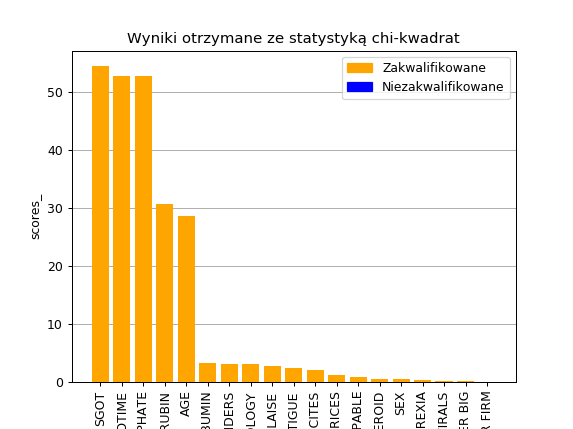

In [298]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# rysowanie wykresu z wynikami


plt.figure("Wyniki otrzymane ze statystyką chi-kwadrat")
plt.title("Wyniki otrzymane ze statystyką chi-kwadrat")

# maska kolorów, podział na zakwalifikowane i niezakwalifikowane cechy
colors = ['orange' if col in zipped_list_columns else 'blue' for col in X.columns]

# tworzenie legendy wykresu
orange_patch = mpatches.Patch(color='orange', label='Zakwalifikowane')
blue_patch = mpatches.Patch(color='blue', label='Niezakwalifikowane')
plt.legend(handles=[orange_patch, blue_patch])

# rysowanie wykresu
ypos = np.arange(len(zipped_list_columns))
plt.ylabel("scores_")
plt.xlabel("Atrybuty")
plt.grid(axis='y', zorder=0)
plt.xticks(ypos, zipped_list_columns, rotation="vertical")
plt.bar(ypos, zipped_list_scores, label="scores_", zorder=2, color=colors)
plt.legend(handles=[orange_patch, blue_patch])

<IPython.core.display.Javascript object>


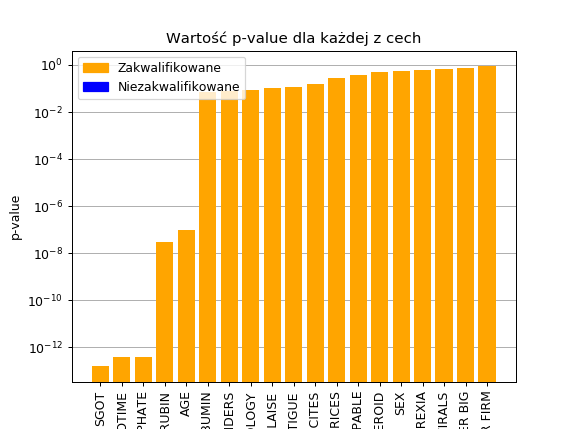

In [299]:
# Rysowanie wykresu z wartościami p-value

plt.figure("Wartość p-value dla każdej z cech")
plt.title("Wartość p-value dla każdej z cech")


plt.ylabel("p-value")
plt.xlabel("Atrybuty")
plt.grid(axis='y', zorder=0)
plt.xticks(ypos, zipped_list_columns, rotation="vertical")
plt.yscale('log')
plt.bar(ypos, zipped_list_pvalues, label="p-value", zorder=2, color=colors)
plt.legend(handles=[orange_patch, blue_patch])

# Standaryzacja wybranych danych

In [300]:
from sklearn.preprocessing import StandardScaler

## Obiekt odpowiedzialny za standaryzację
stdsc = StandardScaler()

# Ewaluacja klasyfikatora przez 5 razy powtórzoną 2-krotną walidacje krzyżową

In [301]:
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# lista w której zostaną zapisane wyniki
results = []

# proporcja podziału danych
n_splits = 2

# ilość iteracji walidacji krzyżowej
n_repeats = 5


# pętla określająca wartosć k dla algorytmu k-NN
for k in [1, 5, 10]:
    # pętla określająca używaną metrykę
    for metric in ['euclidean', 'minkowski']:
        
        # inicjalizacja klasyfikatora k-NN
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # inicjalizacja obiektu do walidacji krzyżwej
        rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
        
        # pętla określająca ilosć użytych cech
        for num_of_features in range(1, rank_range):
            
            # inicjalizacja zmiennej zliczającej średnią dokładność klasyfikatora
            iteration_score = 0
            
            # standaryzacja wybranych cech
            X_sorted_np_std = stdsc.fit_transform(X_sorted_np[:,:num_of_features])
            
            # podział danych za pomocą 5 razy powtórzonej 2-krotnej walidacji krzyżowej
            splitted_data = rkf.split(X_sorted_np_std)
            
            # pętla określająca próbki z walidacji krzyżowej
            for train_index, test_index in splitted_data:
                
                # przygotowanie danych trenujących i testowych
                X_train, X_test = X_sorted_np_std[train_index], X_sorted_np_std[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                # uczenie klasyfikatora za pomocą danych trenujących
                knn.fit(X_train, y_train)
                
                # zliczanie średniej dokładnośći
                iteration_score += (knn.score(X_test, y_test) / (n_splits*n_repeats))
            
            # dodawanie wyników do tabeli
            results.append([k, metric, num_of_features, iteration_score])

# konwersja tabeli do formatu DataFrame
results_df = pd.DataFrame(results, columns=['Parametr k', 'Metryka', 'Liczba cech', 'Dokładność'])

# zapis wyników do pliku
results_df.to_csv("results.csv", sep=";")

# Wyniki

<IPython.core.display.Javascript object>


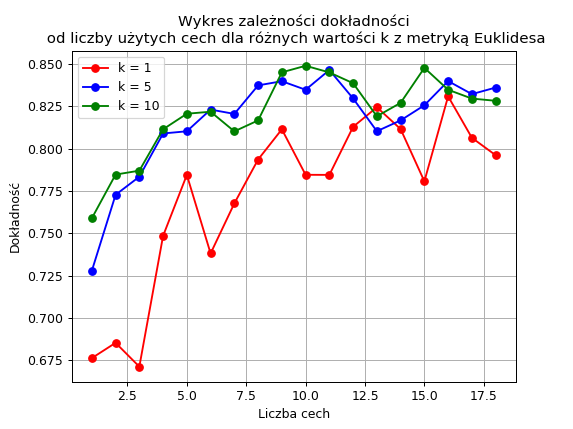

In [302]:
# Wykres zależności dokładności od liczby użytych cech dla różnych wartości k z metryką Euklidesa

plt.figure("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Euklidesa")
plt.title("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Euklidesa")

plt.ylabel('Dokładność')
plt.xlabel('Liczba cech')

plt.grid(zorder=0)

for col, k in zip(['red', 'blue', 'green'],[1, 5, 10]):
    plt.plot(np.arange(1,rank_range),
             results_df.loc[results_df['Parametr k'] == k].loc[results_df['Metryka'] == 'euclidean']['Dokładność'],
             marker='o', color=col, label=f"k = {k}")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


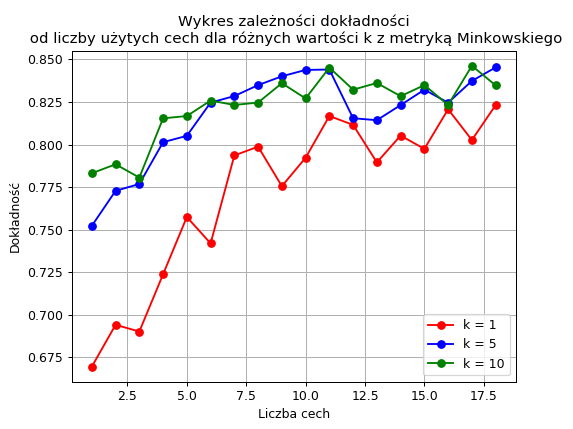

In [303]:
# Wykres zależności dokładności od liczby użytych cech dla różnych wartości k z metryką Minkowskiego

plt.figure("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Minkowskiego")
plt.title("Wykres zależności dokładności\n od liczby użytych cech dla różnych wartości k z metryką Minkowskiego")

plt.ylabel('Dokładność')
plt.xlabel('Liczba cech')

plt.grid(zorder=0)

for col, k in zip(['red', 'blue', 'green'],[1, 5, 10]):
    plt.plot(np.arange(1,rank_range),
             results_df.loc[results_df['Parametr k'] == k].loc[results_df['Metryka'] == 'minkowski']['Dokładność'],
             marker='o', color=col, label=f"k = {k}")
plt.legend()
plt.show()